In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('compile_tegal.xlsx')
df['Tahun'] = pd.to_datetime(df['Tahun'], format='%Y')
df.set_index('Tahun', inplace=True)

In [4]:
# Cell 3: Prepare Data for Forecasting
y = df['Persentase Kemiskinan'].dropna()

In [25]:
# Cell 4: Function to Create Future Dates
def create_future_dates(last_date, n_years):
    return pd.date_range(start=last_date + pd.DateOffset(years=1), periods=n_years, freq='Y')

# Cell 5: Function to Calculate MAPE
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # Create a mask to ignore zero values in y_true
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else np.nan


# Cell 5: Function to Plot Results with Historical Data
def plot_forecast_combined(y, forecast, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y.index, y, label='Actual')
    
    # Combining the historical data with the forecast using pd.concat
    combined = pd.concat([y, forecast])
    plt.plot(combined.index, combined, label=f'{model_name} Forecast', color='orange')
    
    plt.title(f'{model_name} Forecast with Historical Data')
    plt.legend()
    plt.show()



In [22]:
# Cell 7: ARIMA Model
def arima_forecast(y, n_years):
    model = ARIMA(y, order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=n_years)
    return pd.Series(forecast, index=create_future_dates(y.index[-1], n_years))

# Cell 8: KNN Model
def knn_forecast(y, n_years):
    X = np.arange(len(y)).reshape(-1, 1)
    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X, y)
    last_x = X[-1][0]
    future_X = np.arange(last_x + 1, last_x + n_years + 1).reshape(-1, 1)
    forecast = model.predict(future_X)
    return pd.Series(forecast, index=create_future_dates(y.index[-1], n_years))

# Cell 9: SVR Model
def svr_forecast(y, n_years):
    X = np.arange(len(y)).reshape(-1, 1)
    model = SVR(kernel='rbf')
    model.fit(X, y)
    last_x = X[-1][0]
    future_X = np.arange(last_x + 1, last_x + n_years + 1).reshape(-1, 1)
    forecast = model.predict(future_X)
    return pd.Series(forecast, index=create_future_dates(y.index[-1], n_years))

# Cell 10: Random Forest Model
def rf_forecast(y, n_years):
    X = np.arange(len(y)).reshape(-1, 1)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    last_x = X[-1][0]
    future_X = np.arange(last_x + 1, last_x + n_years + 1).reshape(-1, 1)
    forecast = model.predict(future_X)
    return pd.Series(forecast, index=create_future_dates(y.index[-1], n_years))

In [23]:
# Cell 10: Number of Years for Forecast
n_years = 3  # You can change this value as needed

c:\Users\fezaa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\fezaa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\fezaa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


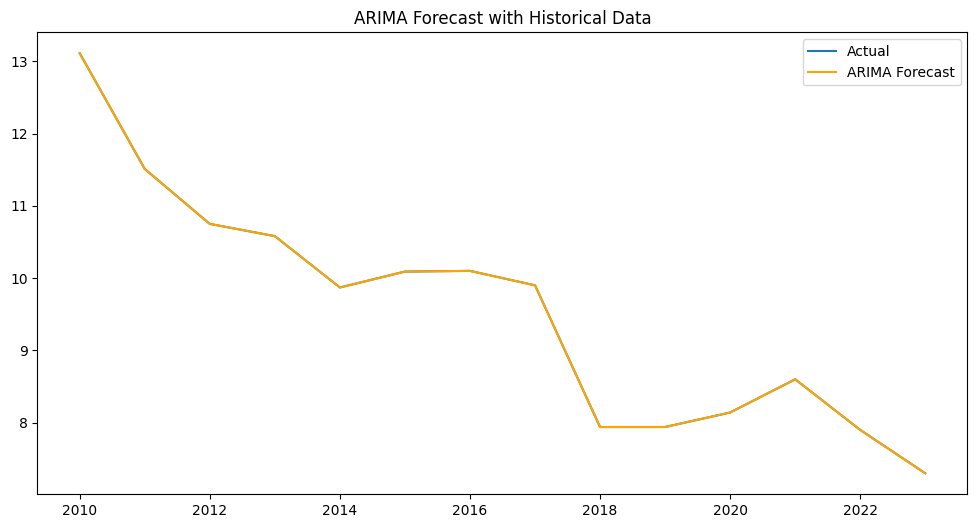

MAPE ARIMA: nan%


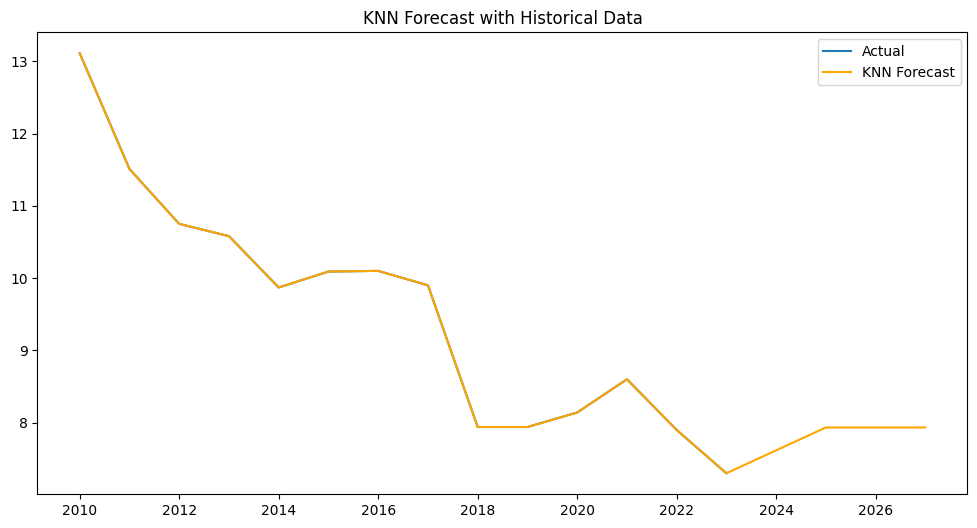

MAPE KNN: nan%


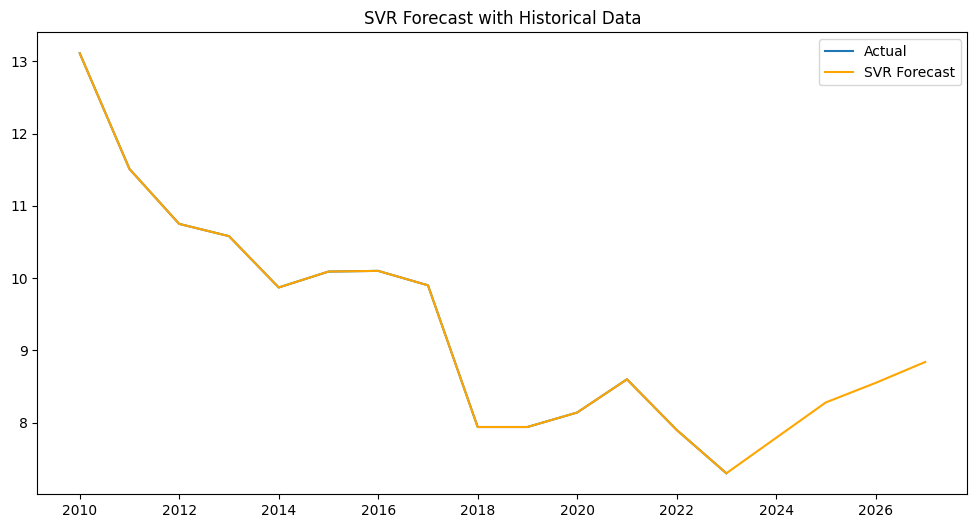

MAPE SVR: nan%


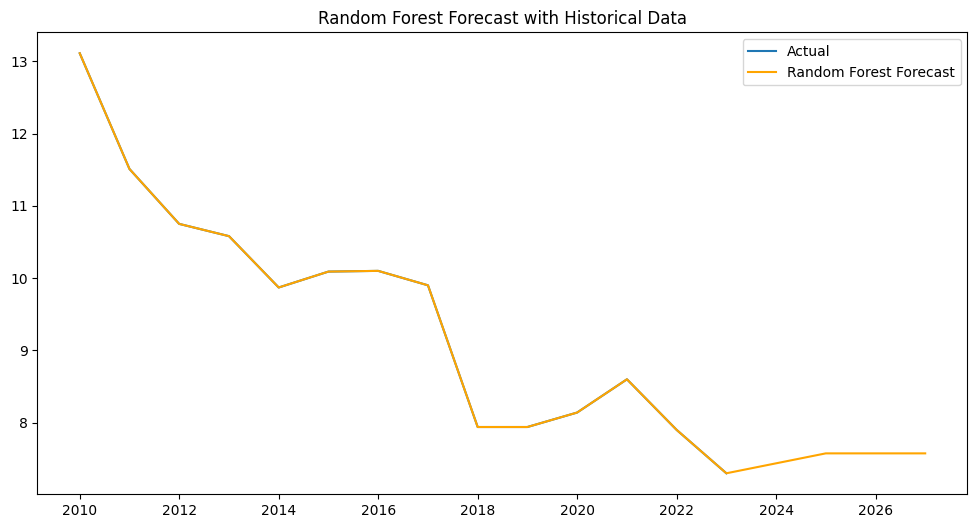

MAPE Random Forest: nan%


In [24]:
# Cell 12: ARIMA Forecast and MAPE
arima_pred = arima_forecast(y, n_years)
plot_forecast_combined(y, arima_pred, 'ARIMA')
arima_mape = calculate_mape(y[-n_years:], arima_pred[:len(y[-n_years:])])
print(f'MAPE ARIMA: {arima_mape:.2f}%')

# Cell 13: KNN Forecast and MAPE
knn_pred = knn_forecast(y, n_years)
plot_forecast_combined(y, knn_pred, 'KNN')
knn_mape = calculate_mape(y[-n_years:], knn_pred[:len(y[-n_years:])])
print(f'MAPE KNN: {knn_mape:.2f}%')

# Cell 14: SVR Forecast and MAPE
svr_pred = svr_forecast(y, n_years)
plot_forecast_combined(y, svr_pred, 'SVR')
svr_mape = calculate_mape(y[-n_years:], svr_pred[:len(y[-n_years:])])
print(f'MAPE SVR: {svr_mape:.2f}%')

# Cell 15: Random Forest Forecast and MAPE
rf_pred = rf_forecast(y, n_years)
plot_forecast_combined(y, rf_pred, 'Random Forest')
rf_mape = calculate_mape(y[-n_years:], rf_pred[:len(y[-n_years:])])
print(f'MAPE Random Forest: {rf_mape:.2f}%')